In [39]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
import keras
from tensorflow.keras.optimizers import Adam

In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] # tập validation
X_train, y_train = X_train[:50000,:], y_train[:50000]


In [41]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(50000, 28, 28) (50000,) (10000, 28, 28) (10000,)


In [42]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)


In [43]:
#one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [44]:
input_shape = (28,28,1)
number_of_classes = 10
epochs = 10

In [45]:
#create model 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
# model.add(MaxPool2D(pool_size=(2, 2),strides = 2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),strides = 2))

# model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(128, activation='relu'))

# model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='sigmoid'))

In [46]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                62730     
                                                                 
Total params: 72,298
Trainable params: 72,298
Non-trainable params: 0
__________________________________________________

In [47]:
H = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)

Epoch 1/10


1563/1563 [==============================] - 30s 19ms/step - loss: 0.2494 - accuracy: 0.9508 - val_loss: 0.0922 - val_accuracy: 0.9712
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0704 - accuracy: 0.9784 - val_loss: 0.0741 - val_accuracy: 0.9794
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0495 - accuracy: 0.9843 - val_loss: 0.0995 - val_accuracy: 0.9737
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0690 - val_accuracy: 0.9820
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0771 - val_accuracy: 0.9831
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0877 - val_accuracy: 0.9811
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0790 - val_accura

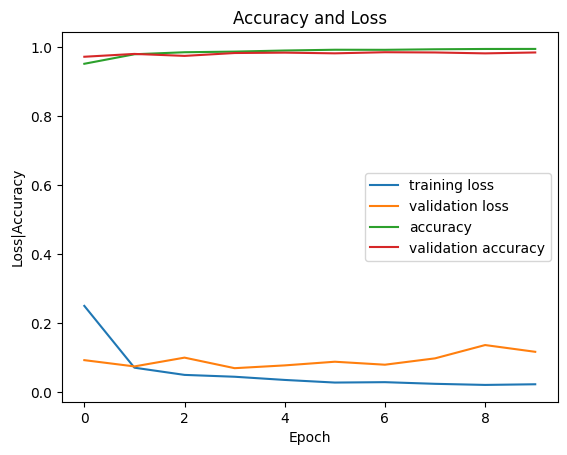

In [48]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [49]:
# Thử với các learning rate khác nhau (giữ nguyên các layer, node và activation function)
learning_rate = [0.1, 0.005, 0.01, 0.00001, 0.2]
colors = ['r', 'g', 'b', 'y', 'c']
for i, lr in enumerate(learning_rate):

  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
  # model.add(MaxPool2D(pool_size=(2, 2),strides = 2))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPool2D(pool_size=(2, 2),strides = 2))

  # model.add(Dropout(0.25))
  model.add(Flatten())
  # model.add(Dense(128, activation='relu'))

  # model.add(Dropout(0.5))
  model.add(Dense(number_of_classes, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])
  print('\nLearning rate = %f' %(lr))
  H = model.fit(X_train, y_train,
                batch_size=32,
                epochs = epochs,
                verbose=0,
                validation_data=(X_val, y_val))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Learning rates')
plt.legend(learning_rate)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()
     


Learning rate = 0.100000


In [ ]:
model.save('./weight/digit_classifier2.h5')